In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
# from joblib import Parallel, delayed

import dataset

In [2]:
def get_distances(positions: torch.Tensor):
    """
    euclidean distances between consecutive points
    """
    sample_cnt, seq_len, _ = positions.shape
     
    distances = []
    for i in range(sample_cnt):
        for j in range(seq_len-1):
            distances.append(torch.norm(positions[i,j+1] - positions[i,j]))
    return distances

In [17]:
DS_KWARGS = dict(
    shape_side_length=1,
    speed_min = 5,
    speed_max = 5,
    # direction_min = 0,
    # direction_max = 2 * np.pi,
    # position_x_min = 2,
    # position_x_max = 14,
    # position_y_min = 6,
    # position_y_max = 14,
    
    position_x_delta = 3,
    position_y_delta = 3,
    
    gravity_min = 0,
    gravity_max = 0,
    restitution_min = 1,
    restitution_max = 1,
    # shape_side_length=2, 
    # invert_colors=True
)

ds = dataset.Dataset(
    **DS_KWARGS
)

QUERY_KWARGS = dict(
    # sample_cnt=(sample_cnt:=10), 
    sample_cnt=(sample_cnt:=50), 
    sequence_length=(sequence_length:=6), 
    as_tensor=True, 
    # seed=321
)

q = ds.query(**QUERY_KWARGS)

imgs, xys = q['samples']
imgs[0].shape

del q['samples']
print(q)
print(xys.shape, imgs.shape)

{'speed': 5.0, 'gravity': 0.0, 'restitution': 1.0}
torch.Size([50, 6, 2]) torch.Size([50, 6, 32, 32, 1])


In [22]:
imgs1, xyz1 = ds.query(shuffle=False, **QUERY_KWARGS)['samples']
imgs2, xyz2 = ds.query(shuffle=False, **QUERY_KWARGS)['samples']
imgs3, xyz3 = ds.query(shuffle=True, **QUERY_KWARGS)['samples']

assert torch.isclose(xyz1[1], xyz2[1]).all()
assert not torch.isclose(xyz1[1], xyz3[1]).all()

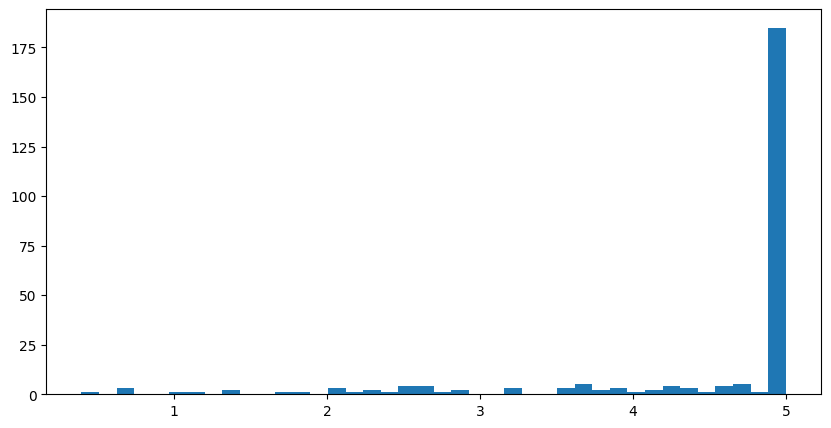

In [23]:
distances = get_distances(xys)

# plot histogram of distances
plt.figure(figsize=(10, 5))
plt.hist(distances, bins=40)
plt.show()

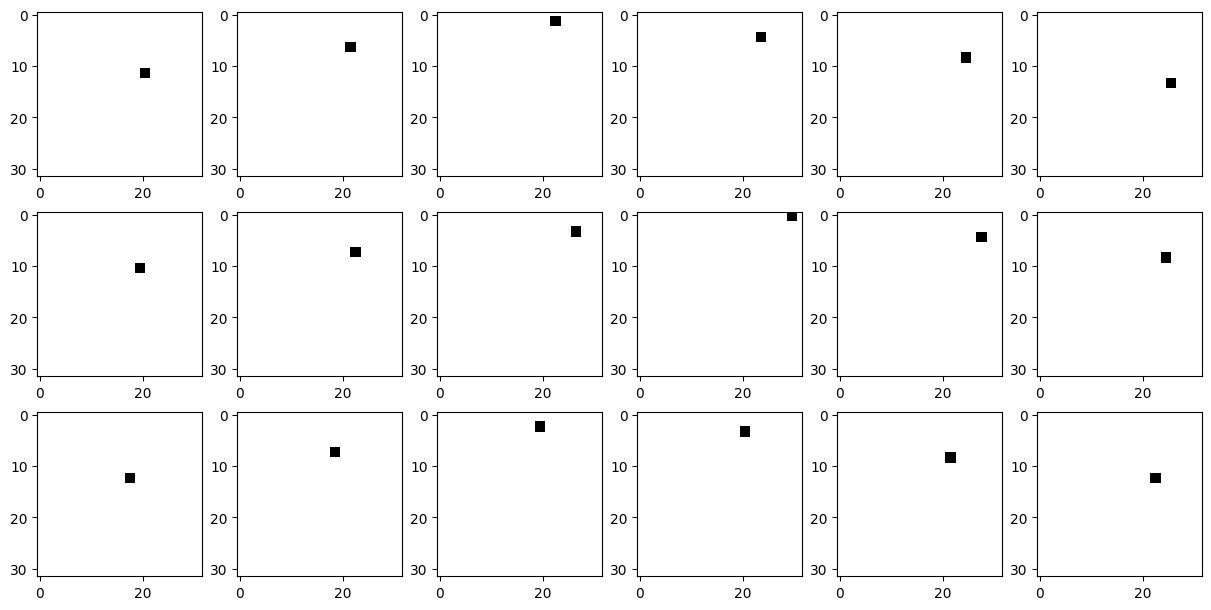

In [24]:
disp_length = min(3, sample_cnt)

plt.figure(figsize=(2*sequence_length, 2*disp_length), constrained_layout=True)
for i in range(disp_length):
    for j in range(sequence_length):
        plt.subplot(disp_length, sequence_length, i*sequence_length+j+1)
        plt.imshow(imgs[i][j], cmap='gray')